# Sound clustering

## Imports

In [3]:
from enum import Enum, auto
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment
from seglearn.feature_functions import base_features, emg_features
from seglearn.transform import Segment, FeatureRep
from sklearn.preprocessing import StandardScaler

from Uniforce import Uniforce
from data.options.UniforceOptions import UniforceOptions

### Sound Helpers

In [181]:
class SoundType(Enum):
    MP3 = auto()


def load_sound(path, soundType: SoundType = SoundType.MP3) -> Optional[np.ndarray]:
    match soundType:
        case SoundType.MP3:
            return AudioSegment.from_file(path)
        case _:
            return None

### Load Sound

In [182]:
sound = load_sound('C:\\Users\\Kostas\\Desktop\\podforce.mp3')
sound

### Sound Convert to Numpy Array

In [183]:
samples = np.array(sound.get_array_of_samples())
samples.shape

(3997696,)

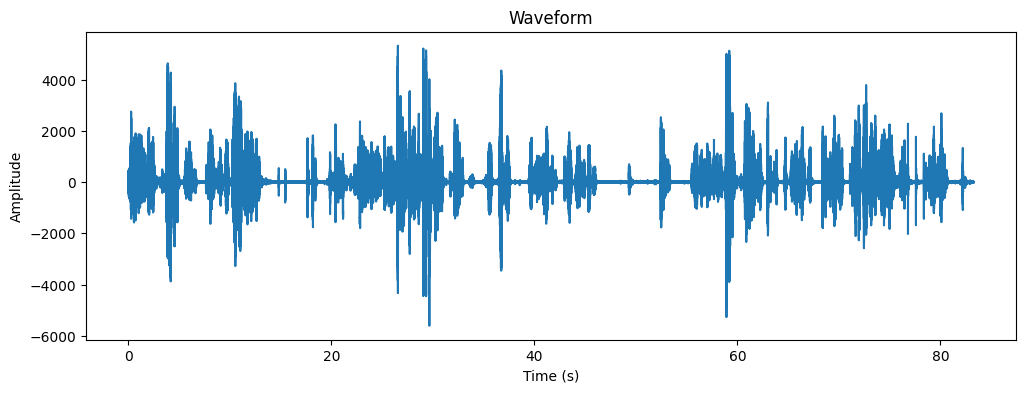

In [184]:
# Get the time axis
time_axis = np.arange(0, len(samples)) / sound.frame_rate

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(time_axis, samples)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [185]:
### Reshape

In [186]:
samples3 = np.reshape(samples, (1, samples.shape[0]))
samples3.shape


(1, 3997696)

In [187]:
1. / sound.frame_rate

2.0833333333333333e-05

In [188]:
from scipy.interpolate import interp1d

# Create an interpolation function
interp_function = interp1d(time_axis, samples3, kind='linear', fill_value='extrapolate')

# Define the desired sample rate for interpolation
desired_sample_rate = 480  # Adjust as needed

# Create a new time array with the desired sample rate
new_time = np.arange(0, time_axis[-1], 1 / desired_sample_rate)

# Interpolate the audio data at the new time points
interpolated_samples = interp_function(new_time)

In [189]:
interpolated_samples.shape

(1, 39977)

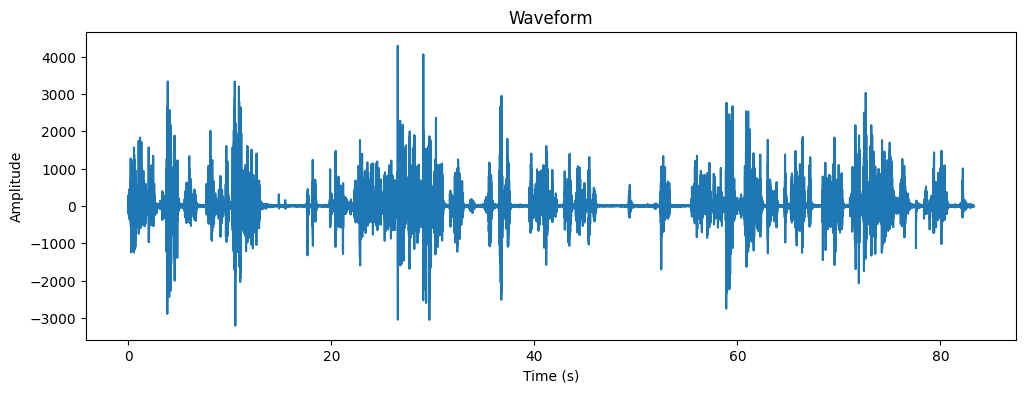

In [190]:
# Get the time axis
time_axis = np.arange(0, interpolated_samples.shape[1]) / desired_sample_rate

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(time_axis, np.squeeze(interpolated_samples))
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [200]:
segment = Segment(width=7, overlap=0.0, shuffle=False).transform(interpolated_samples)

In [201]:
feat = FeatureRep(features={**base_features(), **emg_features()}).fit_transform(segment[0])

In [202]:
feat

array([[-1.60000000e+01, -1.30000000e+01,  8.78600000e+03, ...,
         8.78600000e+03,  3.54279954e+01,  6.00000000e+00],
       [ 5.35714286e+01,  1.10000000e+01,  8.84450000e+04, ...,
         8.84450000e+04,  1.12405516e+02,  6.00000000e+00],
       [-2.62857143e+01, -1.20000000e+01,  6.18300000e+04, ...,
         6.18300000e+04,  9.39832812e+01,  6.00000000e+00],
       ...,
       [ 9.14285714e+00,  1.30000000e+01,  1.20400000e+03, ...,
         1.20400000e+03,  1.31148770e+01,  6.00000000e+00],
       [-1.24285714e+01, -1.20000000e+01,  1.23300000e+03, ...,
         1.23300000e+03,  1.32718822e+01,  6.00000000e+00],
       [ 2.85714286e-01,  5.00000000e+00,  3.84000000e+02, ...,
         3.84000000e+02,  7.40656080e+00,  6.00000000e+00]])

In [203]:
scaler = StandardScaler().fit_transform(feat)

### Executing UniForCE

In [204]:
options = UniforceOptions(alpha=1e-1)

In [205]:
uni = Uniforce(options).fit(scaler)

Starting at 50 centers.
Solving 2-means
Solving 3-means
Solving 4-means
Solving 5-means
Solving 6-means
Solving 7-means
Solving 8-means
Solving 9-means
Solving 10-means
Solving 11-means
Solving 12-means
Solving 13-means
Solving 14-means
Solving 15-means
Solving 16-means
Solving 17-means
Solving 18-means
Solving 19-means
Solving 20-means
Solving 21-means
Solving 22-means
Solving 23-means
Solving 24-means
Solving 25-means
Solving 26-means
Solving 27-means
Solving 28-means
Solving 29-means
Solving 30-means
Solving 31-means
Solving 32-means
Solving 33-means
Solving 34-means
Solving 35-means
Solving 36-means
Solving 37-means
Solving 38-means
Solving 39-means
Solving 40-means
Solving 41-means
Solving 42-means
Solving 43-means
Solving 44-means
Solving 45-means
Solving 46-means
Solving 47-means
Solving 48-means
Solving 49-means
Solving 50-means
Finished at 50 centers.


In [206]:
from IPython.display import HTML

HTML('<h3>Number of clusters with color only : {}</h3>'.format(uni.n_clusters))

### Draw image with cluster colors

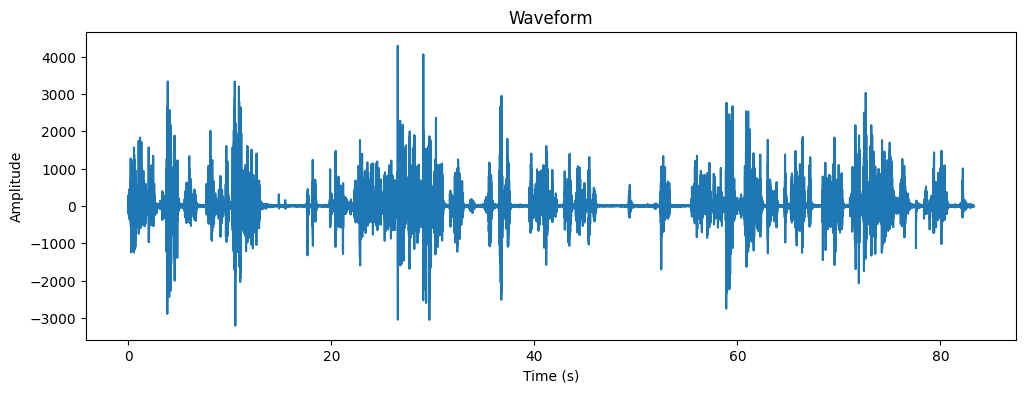

In [207]:
random_colors = np.random.rand(uni.n_clusters, 3)

custom_colormap = plt.cm.colors.ListedColormap(random_colors)

time_axis = np.arange(0, interpolated_samples.shape[1]) / desired_sample_rate

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(time_axis, np.squeeze(interpolated_samples))
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

 ### Side by side comparison

[0.00000000e+00 2.08333333e-03 4.16666667e-03 ... 8.32791667e+01
 8.32812500e+01 8.32833333e+01]


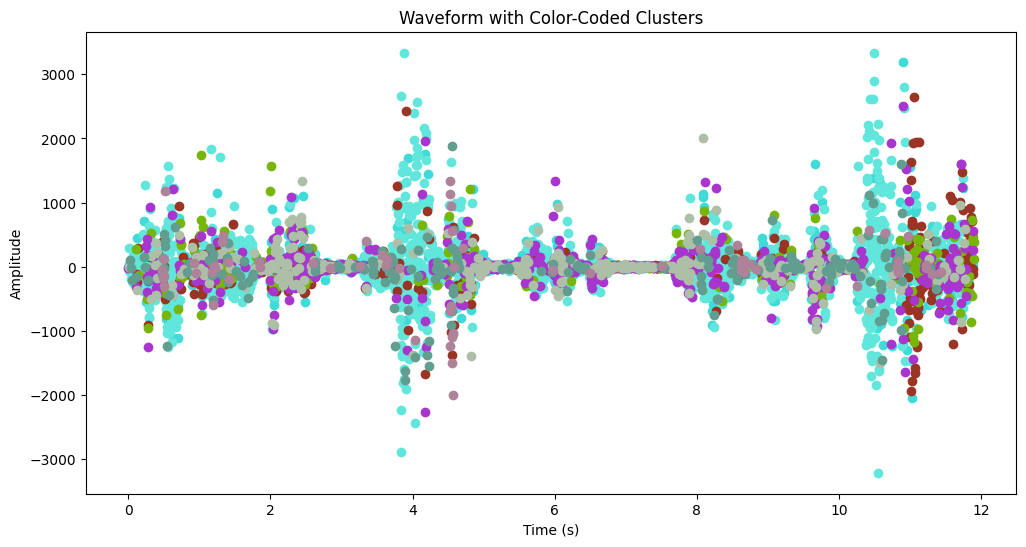

In [208]:
# Calculate time axis

random_colors = np.random.rand(uni.n_clusters, 3)
time_axis = np.arange(0, interpolated_samples.shape[1]) / desired_sample_rate
print(time_axis)

uni.labels

# Plot the waveform with color-coded clusters
plt.figure(figsize=(12, 6))

for cluster_idx in range(uni.n_clusters):
    color = tuple(random_colors[cluster_idx])  # Extract RGB values for the cluster
    indexes = np.where(uni.labels == cluster_idx)[0]
    plt.scatter(time_axis[indexes], interpolated_samples[0][indexes], color=color)

plt.title('Waveform with Color-Coded Clusters')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()